<a href="https://colab.research.google.com/github/vrhughes/DS4002-Project2/blob/main/SCRIPTS/edu_attainment_linear_regr_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importing
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy.optimize import curve_fit

In [2]:
# Link git
! git clone https://github.com/vrhughes/DS4002-Project2

Cloning into 'DS4002-Project2'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 79 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 175.23 KiB | 3.81 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [3]:
# Reading in data
total_data = pd.read_csv('/content/DS4002-Project2/OUTPUTS/fr_analysis_df.csv')

fert_vis = total_data[["Country", "Year", "Avg_Yrs_Education"]]
fert_vis.head()

,Country,Year,Avg_Yrs_Education
0,Bangladesh,1953,NaN
1,Bangladesh,1954,NaN
2,Bangladesh,1955,0.28
3,Bangladesh,1956,NaN
4,Bangladesh,1957,NaN


<ipython-input-17-93544fb0cc89>:2: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=fert_vis, x="Year", y="Avg_Yrs_Education", hue="Country", palette=sns.color_palette("tab10"))


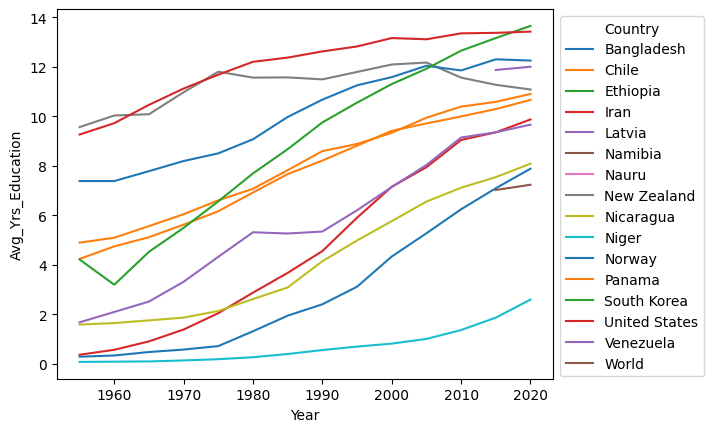

In [17]:
# Graph avg year of education per country
ax = sns.lineplot(data=fert_vis, x="Year", y="Avg_Yrs_Education", hue="Country", palette=sns.color_palette("tab10"))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

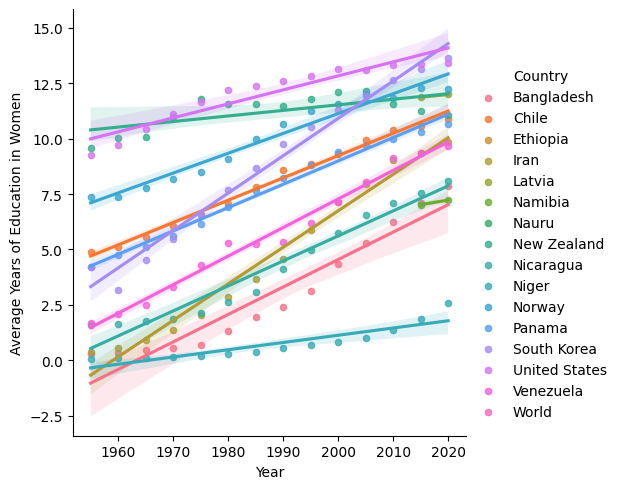

In [16]:
# Plot
g = sns.lmplot(
    data=fert_vis,
    x="Year", y="Avg_Yrs_Education", hue="Country",
    scatter_kws={"s": 20}
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Average Years of Education in Women")

<ipython-input-29-4801a6d0d0e0>:7: UserWarning: The palette list has more values (13) than needed (12), which may not be intended.
  ax_clean = sns.scatterplot(data=fert_vis_clean, x="Year", y="Avg_Yrs_Education", hue="Country", palette=cust_colors)


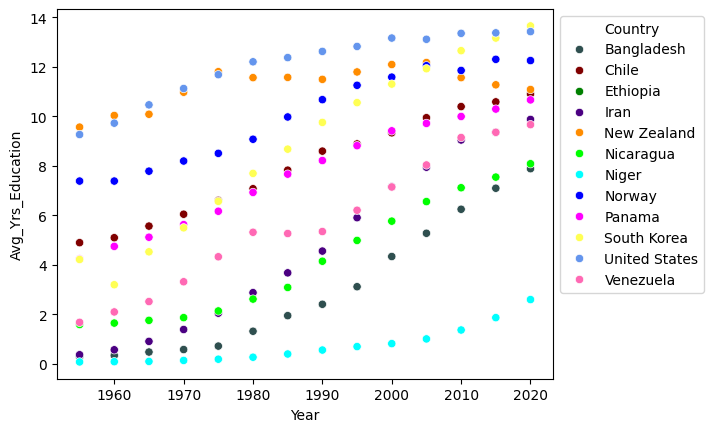

In [29]:
# no latvia nor namibia nor nauru nor world
fert_vis_clean = fert_vis[(fert_vis["Country"] != "Latvia") & (fert_vis["Country"] != "Namibia") & (fert_vis["Country"] != "Nauru") & (fert_vis["Country"] != "World")]

cust_colors = ["#2f4f4f", "#800000", "#008000", "#4b0082", "#ff8c00", "#00ff00", "#00ffff", "#0000ff", "#ff00ff", "#ffff54", "#6495ed", "#ff69b4", "#ffe4c4"]

# Graph avg year of education per country
ax_clean = sns.scatterplot(data=fert_vis_clean, x="Year", y="Avg_Yrs_Education", hue="Country", palette=cust_colors)
sns.move_legend(ax_clean, "upper left", bbox_to_anchor=(1, 1))

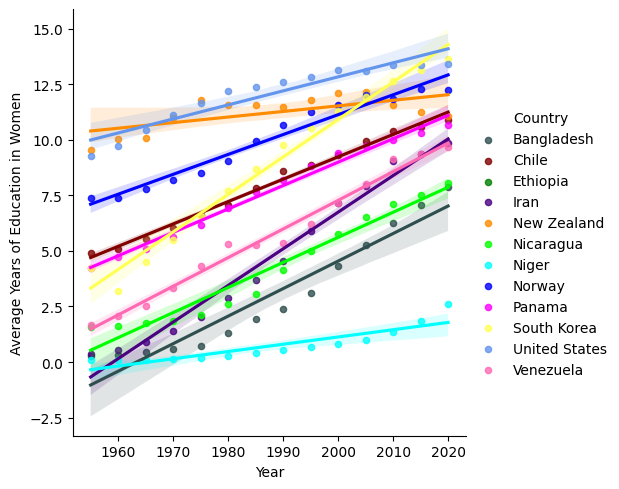

In [31]:
g = sns.lmplot(
    data=fert_vis_clean,
    x="Year", y="Avg_Yrs_Education", hue="Country",
    scatter_kws={"s": 20},
    palette=cust_colors
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Average Years of Education in Women")

In [ ]:
# shifted cube root function
def func(x, a, b, h, k):
  return a*(b*x - h)**(1/3) + k

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# 1: Drop rows with missing values (years between data collection) in the columns we care about
df_clean = fert_vis_clean.dropna(subset=['Avg_Yrs_Education', 'Country', 'Year'])

# 2: Initialize OneHotEncoder & OneHot encode Country col
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop first to avoid multicollinearity
country_encoded = encoder.fit_transform(df_clean[['Country']])

# 3: Convert the encoded country data to a df and concat orig with OneHot encoded
country_encoded_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['Country']))
df_encoded = pd.concat([df_clean.reset_index(drop=True), country_encoded_df], axis=1)

# 4: Initialize a dictionary for MSE for each country
country_mse = {}

# 5: Looping through countries
for country in df_clean['Country'].unique():
    # current country
    country_data = df_encoded[df_encoded['Country'] == country]

    # features
    X = country_data[['Year'] + list(country_encoded_df.columns)]
    y = country_data['Avg_Yrs_Education']

    # linear regression for current country
    model = LinearRegression()
    model.fit(X, y)

    # predict
    y_pred = model.predict(X)

    # calc MSE
    mse = mean_squared_error(y, y_pred)

    # save MSE
    country_mse[country] = mse

# Print
for country, mse in country_mse.items():
    print(f'MSE for {country}: {mse}')


MSE for Bangladesh: 0.5023232339089418
MSE for Chile: 0.03720929356357907
MSE for Iran: 0.25140656200941913
MSE for New Zealand: 0.3364305808477241
MSE for Nicaragua: 0.26763864992150893
MSE for Niger: 0.10135309262166405
MSE for Norway: 0.13680502354788046
MSE for Panama: 0.06183645211930985
MSE for South Korea: 0.2431390580847748
MSE for United States: 0.19748819466248096
MSE for Venezuela: 0.11349437990581124
